In [1]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

In [2]:
nii_file_path = "../data/LAV_SA.nii"

In [3]:
# Read nii file
nii_file = nib.load(nii_file_path)
nii_file_data = nii_file.get_fdata()


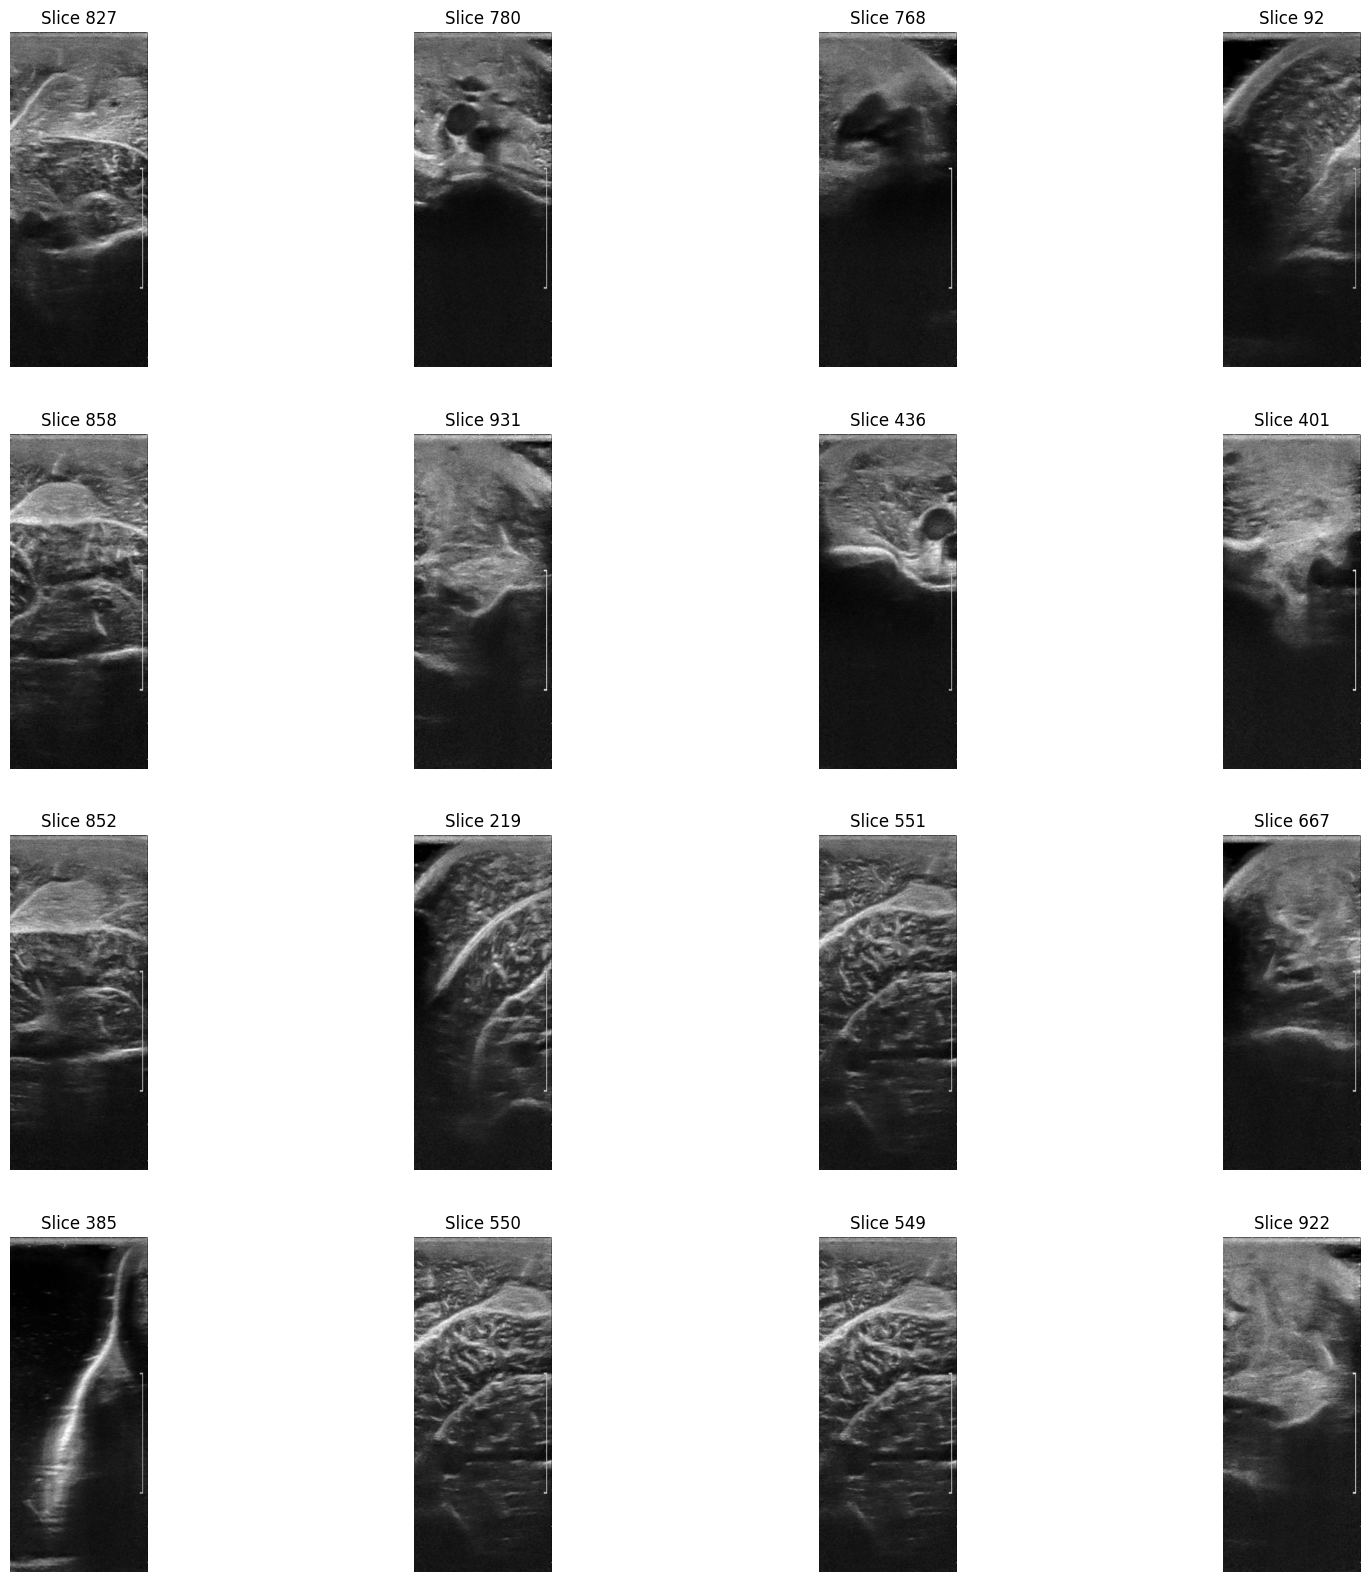

In [4]:
# Plot random slices

num_slices = nii_file_data.shape[2]
num_rows = 4
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for i in range(num_rows):
    for j in range(num_cols):
        slice_index = np.random.randint(num_slices)
        axes[i, j].imshow(nii_file_data[..., slice_index], cmap="gray")
        axes[i, j].axis("off")
        axes[i, j].set_title(f"Slice {slice_index}")

plt.show()


In [7]:
confidence_map_path = "../confidence_map_3d_LAV_SA.nii"

In [8]:
# Read confidence map

confidence_map = nib.load(confidence_map_path)
confidence_map_data = confidence_map.get_fdata()

confidence_map_data = np.clip(confidence_map_data, 0, 1) * 255
confidence_map_data = confidence_map_data.astype(np.uint8)

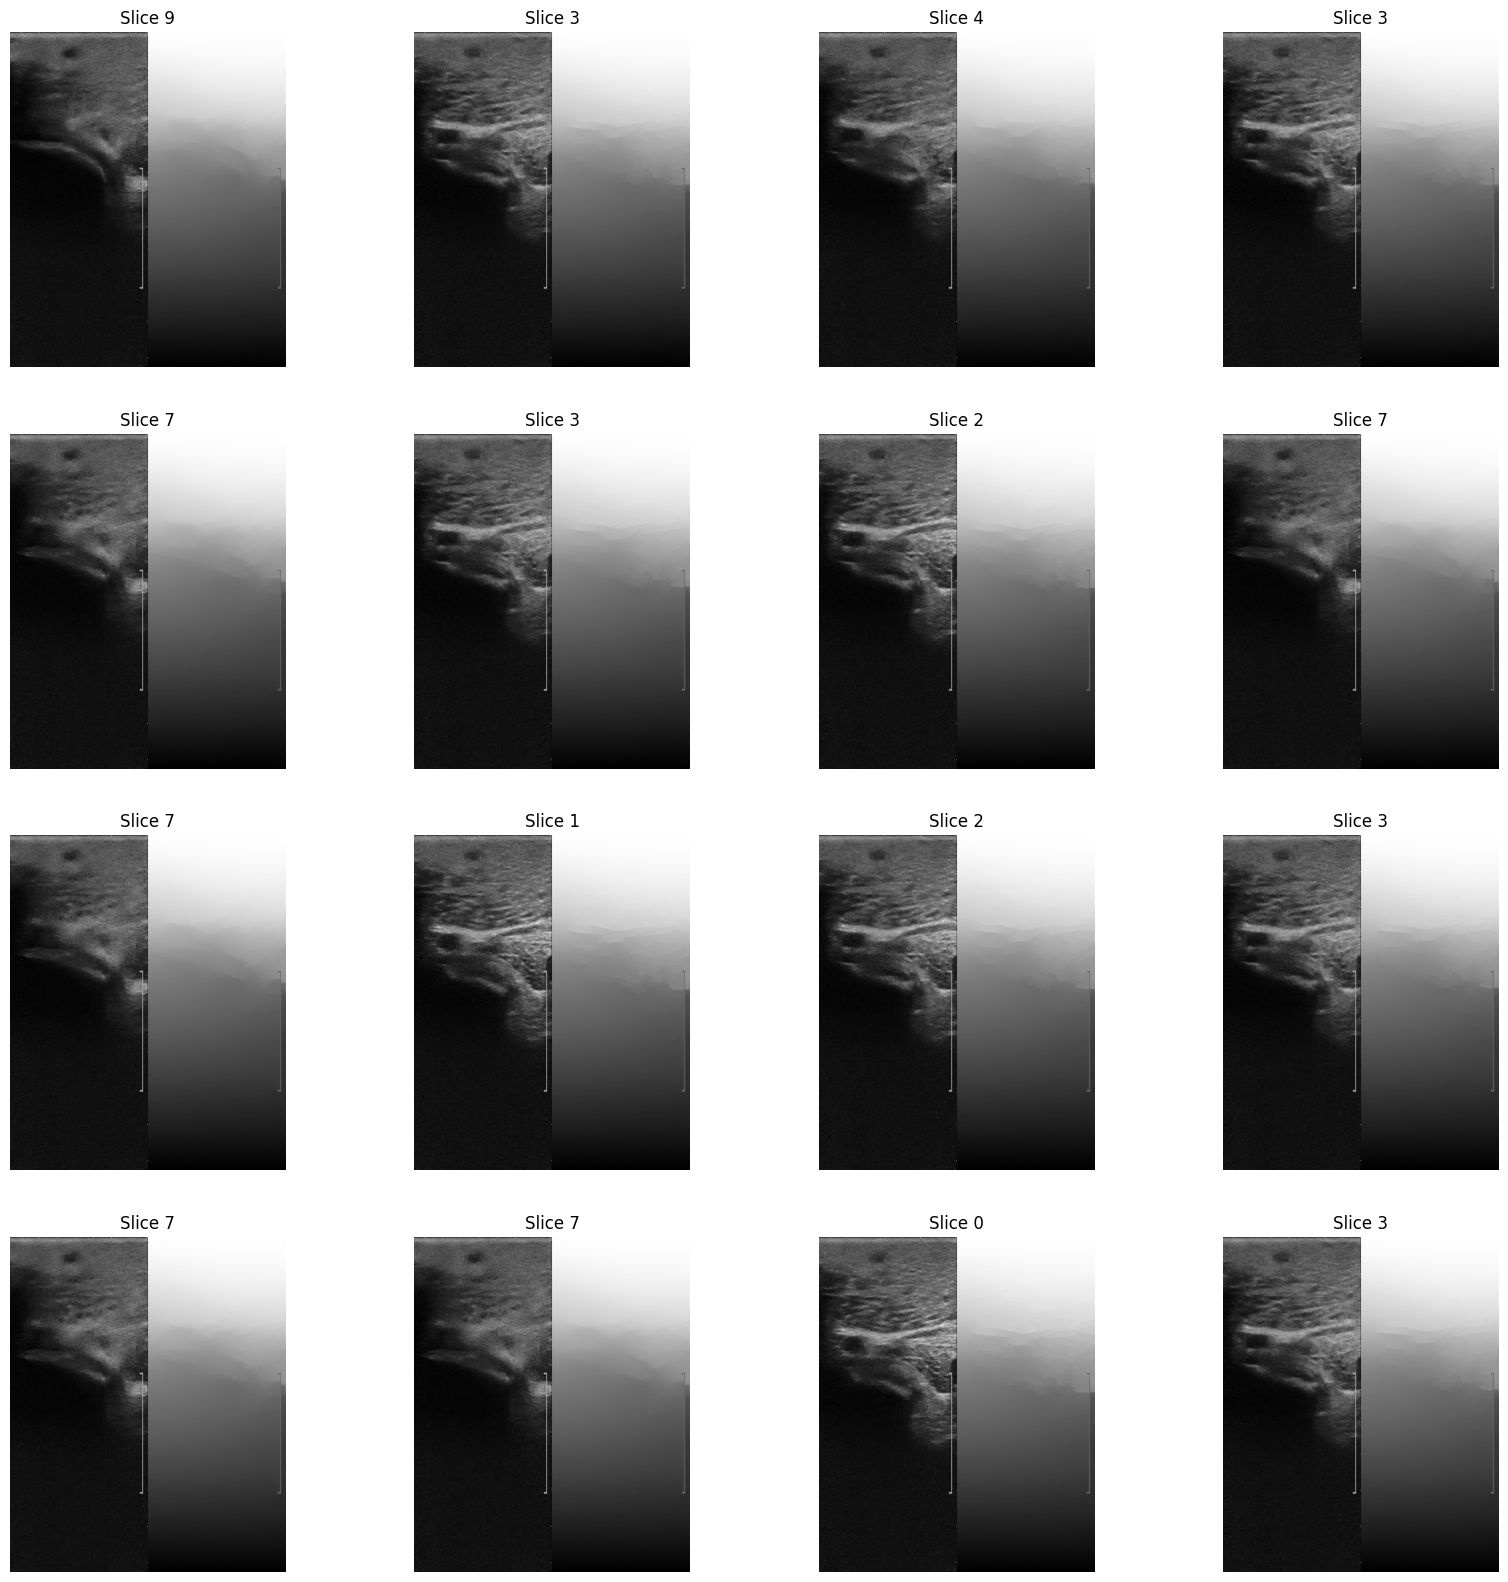

In [9]:
# Plot random slices with corresponding confidence maps side by side

num_slices = confidence_map_data.shape[2]
num_rows = 4
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for i in range(num_rows):
    for j in range(num_cols):
        slice_index = np.random.randint(num_slices)

        nii_slice = nii_file_data[..., slice_index]
        confidence_map_slice = confidence_map_data[..., slice_index]


        concat = np.concatenate((nii_slice, confidence_map_slice), axis=1)

        axes[i, j].imshow(concat, cmap="gray")
        axes[i, j].axis("off")
        axes[i, j].set_title(f"Slice {slice_index}")

plt.show()
